In [111]:
from typing import Optional,Any,Literal
import pandas as pd
from sympy import pi,symbols,diff,init_printing,nsimplify,Rational,sympify,substitution,simplify,evalf,lambdify


# Problema

Un fabricante de botellas desea calcular el diametro D de la base de una botella cónica, dado que tiene un volumen ($V$) deseado y una altura ($h$). Siendo la formula del cono la siguiente:

$$V = \frac{1}{3} \pi (\frac{D}{2})^2 h$$
 

# Datos
## Se proporcionan los siguientes datos

**Volumen deseado (V)** = $1.5x10^{-3}$ $m^3$ 

**Altura de botella (h)** = $0.3m$ 

# Instrucciones

**Se trabajarará con la siguiente función, que se pide como entrada**
$$ f(D) = \frac{1}{3} \pi (\frac{D}{2})^2 h - V$$



In [14]:
#Se pide el valor de la función#
f_D:str = input("Ingresa una funcion en terminos de 3 variables, D,h y V")


In [15]:
#Se convierte el arreglo de caracteres en una funcion simbolica#
f_Ds = sympify(f_D)
f_Ds

pi*D**2*h/12 - V

# Metodo Newton-Ralphson

Se trabajara con $D_0 = 0.3 m$

Primero definimos las variables simbolicas y además ocuparemos tambien derivar la funcion antes de inicializar las iteraciones

In [16]:
init_printing()
#Se definen las variables simbolicas#
D,h,V = symbols('D h V')
#funcion_volumen = 1/3*pi*(D/2)**2*h-V


Procedemos a derivar la función respecto a $D$

In [17]:
derivada_volumen = diff(f_Ds,D)
derivada_volumen

# Iteraciones

Ahora realizamos el ciclo para obtener el valor del Volmen optimo, manteniendo fijo el valor de $V$ y $h$

- Definimos los valores en arreglos para imprimirlos en una tabla
- Definimos un ciclo while, con un error con el valor real y con el actual, ademas de añadir los valores recopilados de las variables a los arreglos
- Imprimimos la tabla con los resultados

- Utilizamos la formula de Newton-Raphson para encontrar la raíz

**$X_{i+1} = X_i - \frac{f(x)}{f'(x)} $**


In [18]:
# Valor real
valor_real:float = 0.138


# Arreglos/Listas para la tabla
iteraciones:int = []
valores_xi:list = []
f_x:list = []
f_dx:list = []

Error_vr:list = []
Error_va:list = []


# Input 
**Se solicita un valor inicial con input**


In [19]:
#Se define un valor inicial a Xi
Xi = float(input('Define un valor inicial a Xi'))

**Se solicita una tolerancia**

In [20]:
#Input que convierte el string de la tolerancia en un valor double, o flotante
tolerancia = float(input('Ingresa el valor de la tolerancia Ej.(0.01)'))

In [21]:
def newton_raphson() -> None:
    # Se define Xi con el valor que nos piden (0.3), para saber si ya encontramos el valor que buscamos, 
    # y utilizamos el error tambien
    value = Xi
    iteracion:int = 0
    Er:float|int= 1

    while Er > tolerancia:
        
        #Se agrega una iteracion y se agrega a la lista#
        
        iteracion += 1
        print(iteracion)

        iteraciones.append(iteracion)


        #Se evalua Xi y se agregan a la lista#
        f_xv = f_Ds.subs({D : value,V : 1.5e-3,h : 0.3}).evalf()
        f_x.append(f_xv)

        f_dxv = simplify(derivada_volumen.subs({D:value, h:0.3})).evalf()
        f_dx.append(f_dxv)


        #Se calcula el nuevo valor de Xi y se agrega el valor anterior de Xi a la lista utilizando
        # Newton Raphson 
        valor_anterior = value
        
        valores_xi.append(value)
        
        nuevo_valor = value - (f_xv/f_dxv)
        
        value = nuevo_valor
        
        #Se calcula el error con el valor real y el anterior

        if iteracion > 1:
            #Error con valor anterior
            
            Ea = abs((nuevo_valor - valor_anterior)/nuevo_valor)
            Er = abs((nuevo_valor - valor_real)/valor_real)
        
            Error_va.append(Ea)
            Error_vr.append(Er)

        elif iteracion == 1:
            Error_va.append("None")
            Error_vr.append("None")


        print(f_xv,nuevo_valor)


In [22]:
newton_raphson()

1
0.00556858347057703 0.181830988618379
2
0.00109672333919021 0.143432926338091
3
0.000115799983826888 0.138293202759540


In [23]:
iteraciones

In [24]:
pd.DataFrame({"Iteracion":iteraciones,"Valores Diametro":valores_xi,"Valores f(d)":f_x,"Valores f'(d)":f_dx,"Error v_real":Error_vr,"Error v_anterior":Error_va})

,Iteracion,Valores Diametro,Valores f(d),Valores f'(d),Error v_real,Error v_anterior
0,1,0.3,0.00556858347057703,0.0471238898038469,None,None
1,2,0.181830988618379,0.00109672333919021,0.0285619449019234,0.0393690314354437,0.267707445288945
2,3,0.143432926338091,0.000115799983826888,0.0225303913833317,0.00212465767782895,0.0371654099839427


In [25]:
import seaborn as sb
import matplotlib.pyplot as plt

In [99]:
df = pd.DataFrame({'Iteraciones':iteraciones,'Valores':valores_xi})
df["Iteraciones"] = df["Iteraciones"].astype(float)
df["Valores"] = df["Valores"].astype(float)


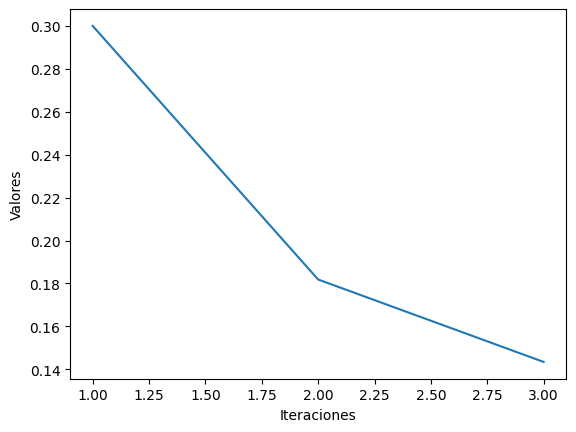

In [100]:
sb.lineplot(x='Iteraciones',y = 'Valores',data= df)
plt.show()

# Metodo de la Secante 

**Se define a continuacion la función que utiliza la secante como método**

Se almacenan los datos en el siguiente arreglo

In [81]:
iteraciones_secante:list = []

valores_xi_1_sec:list = [] # Valores de Xi-1
valores_xi_sec:list = [] # Valores de Xi
valores_xi_posterior:list = [] #Valores de Xi+1

fx_1secante:list = []
fx_secante:list =[] # 

Error_va_secante:list = []


Se solicitan los valores de Xi y de Xi-1

In [29]:
Xi_secante:float = float(input('Ingresa el Valor inicial para el metodo de la secante (Xi)'))
Xi_1:float = float(input('Ingresa el Valor anterior para el metodo de la secante (Xi-1)'))

# Iteraciones

- Se realiza el ciclo con la formula de la secante para el calculo de la raíz
- Se utilizan los valores de los inputs previamente solicitados
- En este caso no es necesario derivar, por lo que se descarta la función derivada

## $X_{i+1} = X_i - \frac{f(Xi)(X_{i-1} - X_i)}{f(X_{i-1}) - f(X_i)}$

In [82]:
def secante() -> None:
    value_xi = Xi_secante
    valuex_1 = Xi_1

    iteracion:int = 0
    Ea:float|int = 1

    while Ea > tolerancia:

        
        #Se agrega una iteracion y se agrega a la lista#
        iteracion += 1
        print(iteracion)

        
        iteraciones_secante.append(iteracion)

        #Se agregan los valores a la lista de Xi y Xi-1 antes de ser cambiados
        valores_xi_1_sec.append(valuex_1); valores_xi_sec.append(value_xi)



        # Se evalua Xi y Xi-1 para agregarse a las listas #
        fxi_1_value = f_Ds.subs({D:valuex_1, V: 1.5e-3, h: 0.3}).evalf() # Evaluacion Xi-1
        fx_1secante.append(fxi_1_value)


        fxi_value = f_Ds.subs({D:value_xi, V: 1.5e-3, h:0.3}).evalf() # Evaluacion Xi
        fx_secante.append(fxi_value)

        xi_posterior = value_xi - (fxi_value*(valuex_1 - value_xi))/(fxi_1_value - fxi_value) #Calculo de Xi+1

        #Se añade Xi a la lista
        valores_xi_posterior.append(xi_posterior)


        #Se guardan las variables para calcular el error antes de cambiarlo
        valor_anterior = value_xi
        valor_nuevo = xi_posterior

        valuex_1 = value_xi; value_xi = xi_posterior; 

        if iteracion > 1:
            #Se calcula el error con el valor actual y el anterior en caso de ser la segunda iteración
            Ea = abs((valor_nuevo - valor_anterior)/valor_nuevo)
            
            #Se añade el error a la lista de la tabla

            Error_va_secante.append(Ea)
            
        elif iteracion == 1:
            Error_va_secante.append("None")



        




In [83]:
secante()

1
2
3
4


In [86]:
pd.DataFrame({"Iteracion":iteraciones_secante,"Valores D Anteriores (Xi-1)":valores_xi_1_sec,"Valores D (Xi)":valores_xi_sec,"Valores D Posteriores (Xi+1)":valores_xi_posterior,"f(Xi-1)":fx_1secante,"f(Xi)":fx_secante, "Error aprox": Error_va_secante})

,Iteracion,Valores D Anteriores (Xi-1),Valores D (Xi),Valores D Posteriores (Xi+1),f(Xi-1),f(Xi),Error aprox
0,1,0.2,0.4,0.165164321951712,0.00164159265358979,0.0110663706143592,None
1,2,0.4,0.165164321951712,0.150689487364683,0.0110663706143592,0.000642507539808078,0.0960573616658376
2,3,0.165164321951712,0.150689487364683,0.139264175005735,0.000642507539808078,0.000283428868206748,0.0820405704372868
3,4,0.150689487364683,0.139264175005735,0.138243607558573,0.000283428868206748,2.32412879590556e-5,0.00738238436615561


In [104]:
sec = pd.DataFrame({"Iteracion":iteraciones_secante, "Values":valores_xi_sec})
sec["Iteracion"] = sec["Iteracion"].astype(int)
sec["Values"] = sec["Values"].astype(float)


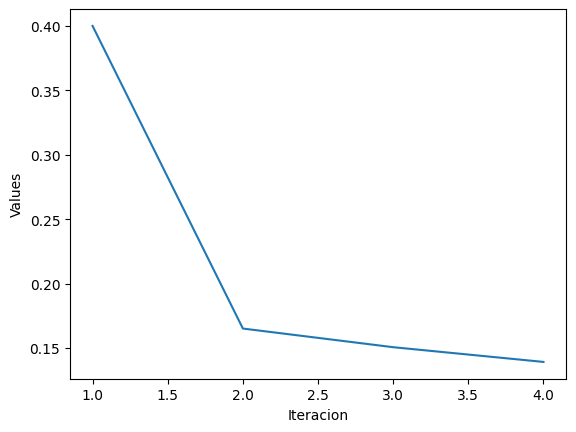

In [105]:
sb.lineplot(x = 'Iteracion', y = 'Values', data = sec)
plt.show()

# Se grafican las funciones para analizar su resultado

- Se muestran los puntos de los metodos en la grafica original

In [106]:
import numpy as np

In [114]:
f_evaluable = lambdify(D,f_Ds.subs({V:1.5e-3,h:0.3}), "numpy")

In [142]:
x_vals = np.linspace(-1,10,20)
y_vals = f_evaluable(x_vals)

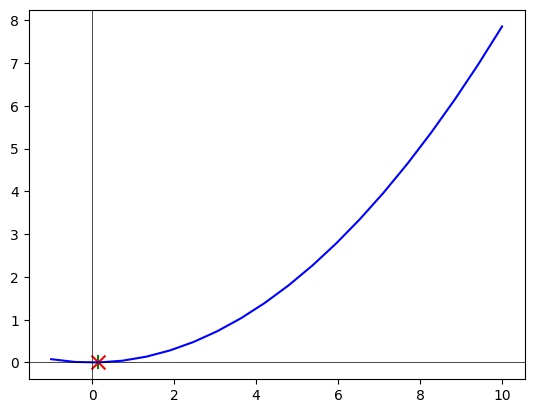

In [ ]:
plt.plot(x_vals,y_vals,label ="Prueba", color = 'b')
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

#Metodo Newton Raphson
plt.scatter(valores_xi[-1], f_x[-1], color = 'g', marker = '|', s = 100)

#Metodo Secante
plt.scatter(valores_xi_sec[-1],fx_1secante[-1], color = 'r', marker= 'x', s = 100, label = "Secante")